In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk 


In [30]:
df=pd.read_csv('diabetes.csv')

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
corr=df.corr()

<AxesSubplot:>

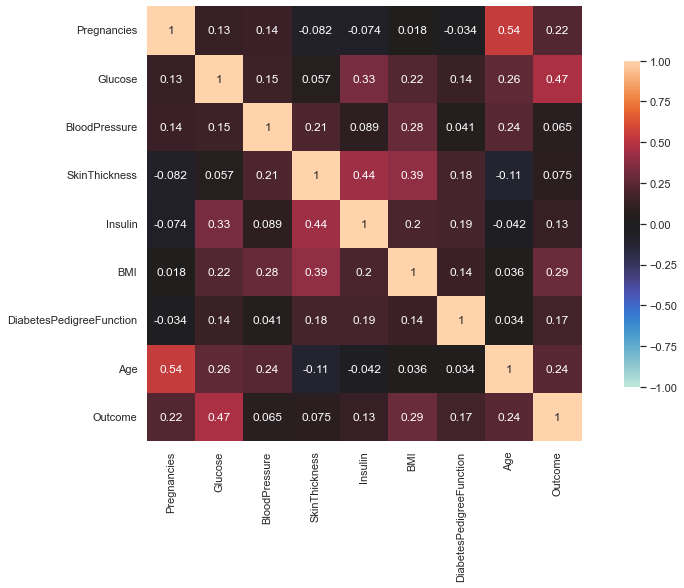

In [34]:
cmap=sns.diverging_palette(230, 20, as_cmap=True)
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr,
            linewidth=0.,
            annot=True,
            square=True,
            vmin=-1, 
            vmax=1, 
            center=0,
            cbar_kws={'shrink':.75})

In [35]:
df1=df.copy()

In [36]:
df2=df.copy()

In [37]:
df1=df1.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'], axis=1)
df1.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


# Modelling

In [45]:
x=df1.drop('Outcome', axis=1)
print(x)
y=df1['Outcome']
print(y)


     Pregnancies  Glucose   BMI  Age
0              6      148  33.6   50
1              1       85  26.6   31
2              8      183  23.3   32
3              1       89  28.1   21
4              0      137  43.1   33
..           ...      ...   ...  ...
763           10      101  32.9   63
764            2      122  36.8   27
765            5      121  26.2   30
766            1      126  30.1   47
767            1       93  30.4   23

[768 rows x 4 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score,f1_score
from sklearn.model_selection import train_test_split,KFold, cross_val_score

In [40]:
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.8, random_state=42)

In [41]:
rf=RandomForestClassifier()
log=LogisticRegression()

In [42]:
models=[rf, log]

In [43]:
for model in models: 
    model.fit(x_train, y_train)
    predictions=model.predict(x_test)
    metric=f1_score(y_test,predictions)    
    print(f'The {model} accuracy is {metric}')

The RandomForestClassifier() accuracy is 0.6379310344827586
The LogisticRegression() accuracy is 0.6481481481481481


In [44]:
import joblib
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']